In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

## 이진 분류의 평가 지표
---

### 불균형 데이터
#### 클래스의 비율이 한쪽으로 치우처진 데이터를 말한다.
#### ex) 클릭된 광고(1%), 클릭되지 않은 광고(99%)

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

#### 실제 모델과 비교하기 위해 가단한 규칙을 지원하는 모델
#### DummyClassifier
- strategy :
    - stratified : 클래스 레이블 비율에 맞게 예측한다.
    - most_frequent : 가장 많은 레이블을 예측한다.

#### DummyRegressor 
- strategy :
    - mean : 평균 값을 예측한다.
    - median : 중간값을 예측한다.

In [5]:
# 항상 다수의 클래스를 예측하는 모델을 사용함.
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("에측된 레이블의 레이블", np.unique(pred_most_frequent))
print(f"test score : {dummy_majority.score(X_test, y_test):0.3f}")

# 모든 클래스를 False 로 예측했지만 정확도는 약 90%나 된다.

에측된 레이블의 레이블 [False]
test score : 0.896


In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"test score : {tree.score(X_test, y_test):0.3f}")

# DecisionTreeClassfier 의 성능이 조금 높다.
# 이로써 DecisionTreeClassfier 의 성능이 좋은 편이 아니라는 것을 알 수 있다.

test score : 0.918


In [16]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f"dummy score : {dummy.score(X_test, y_test):0.3f}")

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"logreg score : {logreg.score(X_test, y_test):0.3f}")

dummy score : 0.840
logreg score : 0.984


## 오차행렬

In [18]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬 : \n", confusion)

오차 행렬 : 
 [[402   1]
 [  6  41]]


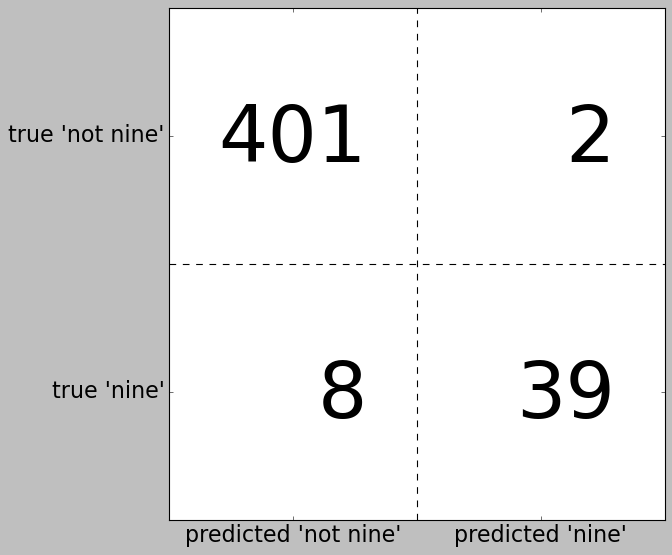

In [19]:
mglearn.plots.plot_confusion_matrix_illustration()

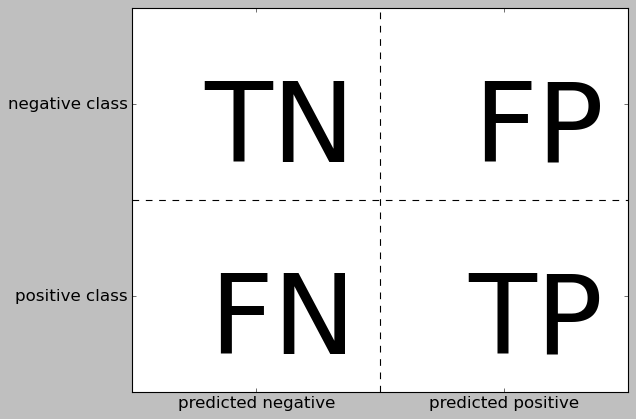

In [20]:
mglearn.plots.plot_binary_confusion_matrix()

In [22]:
print("빈도 기반 더미 모델 :")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델 :")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리 : ")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀 :")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델 :
[[403   0]
 [ 47   0]]

무작위 더미 모델 :
[[362  41]
 [ 42   5]]

결정 트리 : 
[[390  13]
 [ 24  23]]

로지스틱 회귀 :
[[402   1]
 [  6  41]]


### 정확도 = (TP+TN) / (TP+TN+FP+FN)
- 정확하게 분류된 샘플의 비율

### 정밀도(precision) = TP / (TP+FP)
- 예측된 것(TP+FP) 중 얼마나 많은 샘플이 진짜 양성(TP) 인지

### 재현율(recall) = TP / (TP+FN)
- 전체 양성 샘플(TP+FN) 중 에서 얼마나 많은 샘플이 양성 클래스(TP) 로 분류 되었는지

<br>

### f1-점수(f1-score, F) = 2 * (정밀도 * 재현율) / (정밀도 + 재현율) 

In [28]:
from sklearn.metrics import f1_score
print(f"빈도 기반 더미 모델의 f1 score : {f1_score(y_test, pred_most_frequent)}")
print(f"무작위 더미 모델의 f1 score : {f1_score(y_test, pred_dummy):0.2f}")
print(f"트리 모델의 f1 score : {f1_score(y_test, pred_tree):0.2f}")
print(f"로지스틱 회귀 모델의 f1 score : {f1_score(y_test, pred_logreg):.2f}")

빈도 기반 더미 모델의 f1 score : 0.0
무작위 더미 모델의 f1 score : 0.11
트리 모델의 f1 score : 0.55
로지스틱 회귀 모델의 f1 score : 0.92


In [29]:
# 한꺼번에 출력하기.
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["9 아님", '9'], zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [30]:
print(classification_report(y_test, pred_dummy, target_names=["9 아님", '9']))

              precision    recall  f1-score   support

        9 아님       0.90      0.90      0.90       403
           9       0.11      0.11      0.11        47

    accuracy                           0.82       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.82      0.81       450



In [31]:
print(classification_report(y_test, pred_logreg, target_names=["9 아님", '9']))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450

